# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [2]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    
    return ((1-x)**2)+100*((y-x**2)**2)
    
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    return [(-2*(1-x))-(400*x*(y-x**2)),200*(y-x**2)]

Before proceeding, ensure that your functions have been written correctly:

In [3]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [4]:
def gradientDescent(df, r0, eta, nstep):
    x,y = r0
    history = numpy.empty( (nstep+1, 2) )
    history[0,0]=x
    history[0,1]=y
    for i in range(0,nstep):
        r = history[i,0],history[i,1]
        der = df(r)
        history[i+1,0] = history[i,0] - eta*der[0]
        history[i+1,1] = history[i,1] - eta*der[1]
    return history


Test your answer:

In [5]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

Text(0.5,1,'The trajectory of gradient descent algorithm for 3 different step sizes')

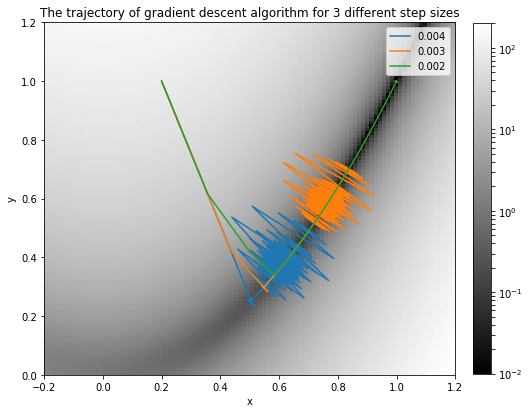

In [6]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point

for g in gammas:
    num= gradientDescent(grad,r0,g,100000)
    x,y = num.T
    plt.plot(x,y,label=g)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("The trajectory of gradient descent algorithm for 3 different step sizes")

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

YOUR ANSWER HERE

In [9]:
print("From the above plot it seems that the smallest step size, eta = 0.002  is the optimal step size. For the larger oscillations one can see oscillations around the extreme values due to the step size being too large. Indeed, even for the smallest step size there will be oscillation on a smaller scale however this is much less pronounced")

From the above plot it seems that the smallest step size, eta = 0.002  is the optimal step size. For the larger oscillations one can see oscillations around the extreme values due to the step size being too large. Indeed, even for the smallest step size there will be oscillation on a smaller scale however this is much less pronounced
